## Uses PyTrends
* Find Documenation here https://pypi.org/project/pytrends/
* First run pip install pytrends in terminal

In [84]:
# You need to run "pip install pytrends" in terminal in order to import pytrends
from pytrends.request import TrendReq
import pandas as pd
import time
startTime = time.time()
pytrend = TrendReq(hl='en-US', tz=360)

colnames = ["keywords"]
df = pd.read_csv("search_terms.csv", names=colnames)
df2 = df["keywords"].values.tolist()
df2.remove("Keywords")

dataset = []

for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2020-01-01 2021-06-30', # from and to dates here
     geo='US-IL') # 
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

df = pd.concat(dataset, axis=1)
df.to_csv('trends.csv')
# executionTime = (time.time() - startTime)
print('Execution time in sec.: ' + str(executionTime))
print(df)

Execution time in sec.: 5.249896049499512
            domestic violence hotline  domestic violence help  \
date                                                            
2020-01-05                          0                       0   
2020-01-12                          0                       0   
2020-01-19                         30                      46   
2020-01-26                          0                       0   
2020-02-02                         28                       0   
...                               ...                     ...   
2021-05-30                         34                       0   
2021-06-06                          0                       0   
2021-06-13                          0                       0   
2021-06-20                          0                       0   
2021-06-27                          0                       0   

            domestic abuse hotline  domestic abuse help  order of protection  
date                             

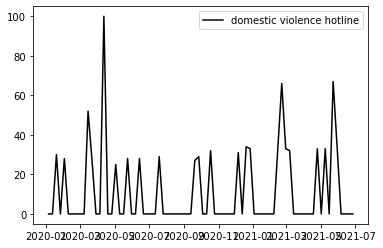

In [94]:
# import matplotlib plotting module to visualize data (make sure matplotlib is installed using pip)
import matplotlib.pyplot as plt

# plot all 5 trends in same chart
plt.figure()
plt.plot(df.index,df["domestic violence hotline"],'black')
plt.legend(['domestic violence hotline']);

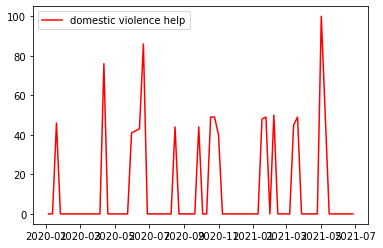

In [93]:
plt.figure()
plt.plot(df.index,df["domestic violence help"],'red')
plt.legend(['domestic violence help']);

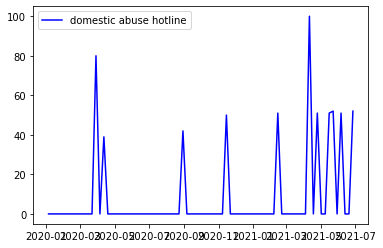

In [92]:
plt.figure()
plt.plot(df.index,df["domestic abuse hotline"],'blue')
plt.legend(['domestic abuse hotline']);

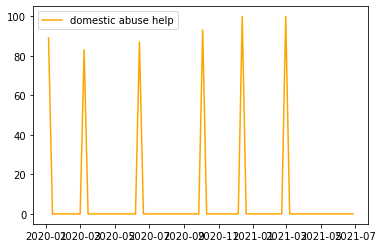

In [91]:
plt.figure()
plt.plot(df.index,df["domestic abuse help"],'orange')
plt.legend(['domestic abuse help']);

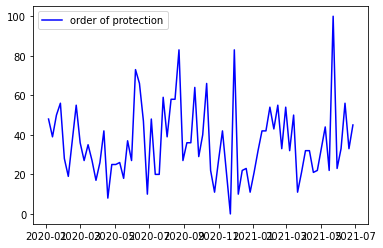

In [90]:
plt.figure()
plt.plot(df.index,df["order of protection"],'blue')
plt.legend(['order of protection']);